# Desmatamento das Áreas de Floresta do Brasil 

---




## 1st Dataset

https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation

### Context

The Amazon rainforest is a moist broadleaf tropical rainforest in the Amazon biome that covers territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana.

The region provides important benefits to communities living near and far. Nearly 500 indigenous communities call the Amazon rainforest home. It’s a highly biodiverse ecosystem, home to untold species of plants and animals. The rainforest can create its own weather and influence climates around the world. Unfortunately, the fragile ecosystem faces the constant threat of deforestation and fires (for natural or anthropogenic causes).

Deforestation happens for many reasons, such as illegal agriculture, natural disasters, urbanization and mining. There are several ways to remove forests - burning and logging are two methods. Although deforestation is happening all over the world today, it is an especially critical issue in the Amazon rainforests, as the only large forest still standing in the world. There, the species of plants and animals they harbor have been disappearing at an alarming rate.

### Content

This dataset refers to 3 files:

**'inpebrazilianamazonfires1999_2019' :** amount of fire outbreaks in Brazilian Amazon by state, month and year, from 1999 to 2019. The original data are public and were extracted from INPE website on December 13th 2019, always from the filtering for the reference salellite and aggregated using Postgres SQL so that you could work with lighter files.
Program: BDQ (Banco de Dados de Queimadas, or Fires Database).
Methodology: detects fire outbreaks through satellite images, updated every 3 hours.

**'defarea2004_2019' :** deforestation area (km²) by year and state, from 2004 to 2019. The data are public and were extracted from INPE website on December 16th 2019. It was already aggregated, so, no data process was made.
Program: PRODES (Programa de Monitoramento da Floresta Amazônica Brasileira por Satélite, or Brazilian Amazon Rainforest Monitoring Program by Satellite).
Methodology: maps primary forest loss using satellite imagery, with 20 to 30 meters of spatial resolution and 16-day revisit rate, in a combination that seeks to minimize the problem of cloud cover and ensure interoperability criteria.

**'elninolanina1999_2019' :** Data about start year, end year, and severity of 2 of the most important climatic phenomena.
Data were extracted from Golden Gate Weather Services on December 20th 2019 and were unpivoted.


### Inspiration

The importance of the Amazon rainforest for the balance of the world environment is unquestionable. Is Amazon Degradation Increasing?

## Python Environment Setup

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Checking the files sizes

In [124]:
%%bash
echo $(pwd) # present working directory
ls -l -h datasets/brazilian-amazon-rainforest-degradation/*

/home/thiago/Dropbox/Federal/2021_1/icd/projetoFinal/icd2021projetoFinal
-rw-r--r-- 1 thiago thiago  829 Jun 23 09:28 datasets/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv
-rw-r--r-- 1 thiago thiago  453 Jun 23 09:29 datasets/brazilian-amazon-rainforest-degradation/el_nino_la_nina_1999_2019.csv
-rw-r--r-- 1 thiago thiago 151K Jun 23 09:29 datasets/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv


### Checking the files structures

#### Amazon Fires Dataset

##### About this file
Amount of fire outbreaks in Brazilian Amazon by state, month and year, from 1999 to 2019. The original data are public and were extracted from INPE website on December 13th 2019, always from the filtering for the reference salellite and aggregated using Postgres SQL so that you could work with lighter files. Program: BDQ (Banco de Dados de Queimadas, or Fires Database). Methodology: detects fire outbreaks through satellite images, updated every 3 hours.

Fonte: https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation?select=inpe_brazilian_amazon_fires_1999_2019.csv

In [125]:
%%bash
head datasets/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv

"year","month","state","latitude","longitude","firespots"
"1999","1","AMAZONAS","-2.3711133333333333","-59.8999333333333333","3"
"1999","1","MARANHAO","-2.2573947222222222","-45.4878305555555556","36"
"1999","1","MATO GROSSO","-12.6606333333333333","-55.0579888888888889","18"
"1999","1","PARA","-2.4748204597701149","-48.5469666666666667","87"
"1999","1","RONDONIA","-12.8617000000000000","-60.5131000000000000","1"
"1999","1","RORAIMA","3.4032246666666667","-60.6228533333333333","15"
"1999","2","AMAPA","-0.15500000000000000000","-52.6831000000000000","1"
"1999","2","AMAZONAS","-2.7631669767441860","-63.4297813953488372","43"
"1999","2","MATO GROSSO","-12.6199875000000000","-55.3753625000000000","8"


In [126]:
%%bash
tail datasets/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv

"2019","11","TOCANTINS","-6.3220909090909091","-48.4430227272727273","44"
"2019","12","ACRE","-10.1630000000000000","-68.0680000000000000","1"
"2019","12","AMAPA","0.96425806451612903226","-51.0787258064516129","62"
"2019","12","AMAZONAS","-4.1361447368421053","-60.4023618421052632","152"
"2019","12","MARANHAO","-3.3072914171656687","-45.8331417165668663","501"
"2019","12","MATO GROSSO","-12.1383851351351351","-56.0662972972972973","148"
"2019","12","PARA","-2.9767273437500000","-50.9093164062500000","1280"
"2019","12","RONDONIA","-10.8092619047619048","-62.8904523809523810","42"
"2019","12","RORAIMA","2.8566666666666667","-60.4319629629629630","27"
"2019","12","TOCANTINS","-6.7693809523809524","-48.4756666666666667","21"


##### **Data Dictionary**
**year** Year of occurrence

**month** Month of occurrence

**state** State of occurrence

**latitude** Average latitude of all occurrences in this month, year and state

**longitude** Average longitude of all occurrences in this month, year and state

**firespots** Number of forest fire outbreaks

#### Deforestation Area Dataset

##### About this file
Deforestation area (km²) by year and state, from 2004 to 2019. The data are public and were extracted from INPE website on December 16th 2019. It was already aggregated, so, no data process was made. Program: PRODES (Programa de Monitoramento da Floresta Amazônica Brasileira por Satélite, or Brazilian Amazon Rainforest Monitoring Program by Satellite). Methodology: maps primary forest loss using satellite imagery, with 20 to 30 meters of spatial resolution and 16-day revisit rate, in a combination that seeks to minimize the problem of cloud cover and ensure interoperability criteria.

Fonte: https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation?select=def_area_2004_2019.csv

In [127]:
%%bash
head datasets/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv

﻿Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
2004,728,1232,46,755,11814,8870,3858,311,158,27772
2005,592,775,33,922,7145,5899,3244,133,271,19014
2006,398,788,30,674,4333,5659,2049,231,124,14286
2007,184,610,39,631,2678,5526,1611,309,63,11651
2008,254,604,100,1271,3258,5607,1136,574,107,12911
2009,167,405,70,828,1049,4281,482,121,61,7464
2010,259,595,53,712,871,3770,435,256,49,7000
2011,280,502,66,396,1120,3008,865,141,40,6418
2012,305,523,27,269,757,1741,773,124,52,4571


In [128]:
%%bash
tail datasets/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv

2010,259,595,53,712,871,3770,435,256,49,7000
2011,280,502,66,396,1120,3008,865,141,40,6418
2012,305,523,27,269,757,1741,773,124,52,4571
2013,221,583,23,403,1139,2346,932,170,74,5891
2014,309,500,31,257,1075,1887,684,219,50,5012
2015,264,712,25,209,1601,2153,1030,156,57,6207
2016,372,1129,17,258,1489,2992,1376,202,58,7893
2017,257,1001,24,265,1561,2433,1243,132,31,6947
2018,444,1045,24,253,1490,2744,1316,195,25,7536
2019,688,1421,8,215,1685,3862,1245,617,21,9762


##### **Data Dictionary**

**Ano/Estados** Year of occurrence

**AC** Deforested area in Acre state (km²)

**AM** Deforested area in Amazonas state (km²)

**AP** Deforested area in Amapa state (km²)

**MA** Deforested area in Maranhao state (km²)

**MT** Deforested area in Mato Grosso state (km²)

**PA** Deforested area in Para state (km²)

**RO** Deforested area in Rondonia state (km²)

**RR** Deforested area in Roraima state (km²)

**TO** Deforested area in Tocantins state (km²)

**AMZ LEGAL** (No description provided.)

## Creating DataFrames

### Amazon Fires Dataframe

In [129]:
amazon_fires_df = pd.read_csv('datasets/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv')
amazon_fires_df

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1
...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27


In [130]:
amazon_fires_df.dtypes

year           int64
month          int64
state         object
latitude     float64
longitude    float64
firespots      int64
dtype: object

In [131]:
amazon_fires_df['year'].value_counts()

2018    105
2016    105
2015    105
2004    104
2013    104
2012    104
2007    104
2009    103
2010    103
2019    103
2005    103
2014    102
2003    102
2017    102
2008    101
2011    101
2006    100
2002     97
2000     87
1999     85
2001     84
Name: year, dtype: int64

In [132]:
amazon_fires_df['month'].value_counts()

9     189
10    189
8     188
11    188
7     183
12    181
6     177
1     169
5     169
4     160
2     158
3     153
Name: month, dtype: int64

In [133]:
amazon_fires_df['state'].value_counts()

MATO GROSSO    252
AMAZONAS       250
PARA           250
RONDONIA       246
RORAIMA        243
MARANHAO       241
TOCANTINS      221
ACRE           204
AMAPA          197
Name: state, dtype: int64

In [134]:
amazon_fires_df['latitude'].value_counts()

-7.632000     2
-0.919000     2
 1.328000     2
 0.098250     2
-2.371113     1
             ..
-8.720655     1
 2.613431     1
-11.523333    1
-4.900091     1
-6.769381     1
Name: latitude, Length: 2100, dtype: int64

In [135]:
amazon_fires_df['longitude'].value_counts()

-48.053000    2
-48.649000    2
-59.899933    1
-60.883675    1
-52.250000    1
             ..
-71.189759    1
-60.802742    1
-62.297778    1
-52.954182    1
-48.475667    1
Name: longitude, Length: 2102, dtype: int64

In [136]:
amazon_fires_df['firespots'].value_counts()

1        93
2        81
3        49
4        45
5        34
         ..
14938     1
190       1
600       1
565       1
1280      1
Name: firespots, Length: 954, dtype: int64

In [137]:
amazon_fires_df.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [138]:
amazon_fires_df.isnull().sum()

year         0
month        0
state        0
latitude     0
longitude    0
firespots    0
dtype: int64

##### **Revised Data Dictionary**

| Variable  | Description                                                | Data Type |
| --------- | ---------------------------------------------------------- | --------- |
| year | Year of occurrence    | Ordinal |
| month | Month of occurrence  | Ordinal |
| state | State of occurrence  | Nominal |
| latitude | Average latitude of all occurrences in this month, year and state  | Numerical |
| longitude | Average longitude of all occurrences in this month, year and state | Numerical |
| firespots | Number of forest fire outbreaks | Numerical |

### Deforestation Area Dataframe

In [139]:
def_area_df = pd.read_csv('datasets/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv')
def_area_df

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


In [140]:
def_area_df.isnull().sum()

Ano/Estados    0
AC             0
AM             0
AP             0
MA             0
MT             0
PA             0
RO             0
RR             0
TO             0
AMZ LEGAL      0
dtype: int64

#### Checking if `AMZ LEGAL`is equal the sum of the all countries areas

In [141]:
column_list = list(def_area_df)
column_list.remove('AMZ LEGAL')
column_list.remove('Ano/Estados')
print(column_list)
def_area_df["sum"] = def_area_df[column_list].sum(axis=1)
def_area_df["sum"] == def_area_df["AMZ LEGAL"]

['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO']


0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
dtype: bool

In [142]:
def_area_df.drop(columns=["sum"], inplace=True)
def_area_df

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


Segundo o IBGE, "A Amazônia Legal corresponde à área de atuação da Superintendência de Desenvolvimento da Amazônia - SUDAM delimitada em consonância ao Art. 2o da Lei Complementar n. 124, de 03.01.2007. A região é composta por 772 municípios distribuídos da seguinte forma: 52 municípios de Rondônia, 22 municípios do Acre, 62 do Amazonas, 15 de Roraima, 144 do Pará, 16 do Amapá, 139 do Tocantins, 141 do Mato Grosso, bem como, por 181 Municípios do Estado do Maranhão situados ao oeste do Meridiano 44º, dos quais, 21 deles, estão parcialmente integrados na Amazônia Legal. Possui uma superfície aproximada de 5.015.067,75 km², correspondente a cerca de 58,9% do território brasileiro."

Fonte: https://www.ibge.gov.br/geociencias/cartas-e-mapas/mapas-regionais/15819-amazonia-legal.html?=&t=o-que-e

"O conceito de Amazônia Legal foi instituído pelo governo brasileiro como forma de planejar e promover o desenvolvimento social e econômico dos estados da região amazônica, que historicamente compartilham os mesmos desafios econômicos, políticos e sociais. Baseados em análises estruturais e conjunturais, seus limites territoriais tem um viés sociopolítico e não geográfico, isto é, não são definidos pelo bioma Amazônia – que ocupa cerca de 49% do território nacional e se estende também pelo território de oito países vizinhos -, mas pelas necessidades de desenvolvimento identificadas na região.

A Amazônia Legal é uma área de 5.217.423 km², que corresponde a 61% do território brasileiro. Além de abrigar todo o bioma Amazônia brasileiro, ainda contém 20% do bioma Cerrado e parte do Pantanal matogrossesense."

Fonte: https://www.oeco.org.br/dicionario-ambiental/28783-o-que-e-a-amazonia-legal/

"O que é? Amazônia Legal
2008 . Ano 5 . Edição 44 - 08/06/2008

Amazônia Legal

A Amazônia Legal é uma área que corresponde a 59% do território brasileiro e engloba a totalidade de oito estados (Acre, Amapá, Amazonas, Mato Grosso, Pará, Rondônia, Roraima e Tocantins) e parte do Estado do Maranhão (a oeste do meridiano de 44ºW), perfazendo 5,0 milhões de km². Nela residem 56% da população indígena brasileira. O conceito de Amazônia Legal foi instituído em 1953 e seus limites territoriais decorrem da necessidade de planejar o desenvolvimento econômico da região e, por isso, não se resumem ao ecossistema de selva úmida, que ocupa 49% do território nacional e se estende também pelo território de oito países vizinhos. Os limites da Amazônia Legal foram alterados várias vezes em conseqüência de mudanças na divisão política do país. O Plano Amazônia Sustentável (PAS), lançado em maio deste ano pelo governo federal, considera integralmente o Estado do Maranhão como parte da Amazônia Brasileira."

Fonte: https://www.ipea.gov.br/desafios/index.php?option=com_content&id=2154:catid=28

##### **Revised Data Dictionary**

| Variable  | Description                                                | Data Type |
| --------- | -----------------------------------| ------ |
| Ano | Year of occurrence    | Ordinal |
| AC | Deforested area in Acre state (km²) | Numerical |
| AM | Deforested area in Amazonas state (km²) | Numerical |
| AP | Deforested area in Amapa state (km²) | Numerical |
| MA | Deforested area in Maranhao state (km²) | Numerical |
| MT | Deforested area in Mato Grosso state (km²) | Numerical |
| PA | Deforested area in Para state (km²) | Numerical |
| RO | Deforested area in Rondonia state (km²) | Numerical |
| RR | Deforested area in Roraima state (km²) | Numerical |
| TO | Deforested area in Tocantins state (km²) | Numerical |
| AMZ LEGAL | Deforested area in Legal Amazon (km²) | Numerical |

### Exploratory Data Analysis

<AxesSubplot:xlabel='month'>

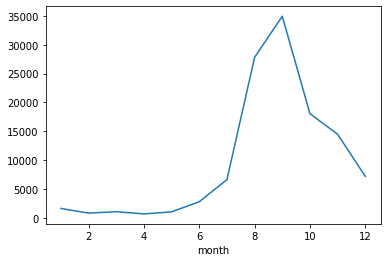

In [91]:
sum_firespots_amz_legal = amazon_fires_df.groupby(['year', 'month'])['firespots'].sum()
sum_firespots_amz_legal.groupby('month').mean().plot()

<AxesSubplot:xlabel='month'>

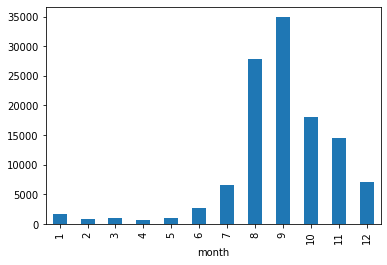

In [96]:
sum_firespots_amz_legal.groupby('month').mean().plot(kind="bar")

<AxesSubplot:xlabel='month'>

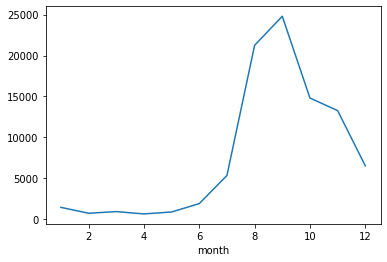

In [93]:
sum_firespots_amz_legal.groupby('month').median().plot()


<AxesSubplot:xlabel='year'>

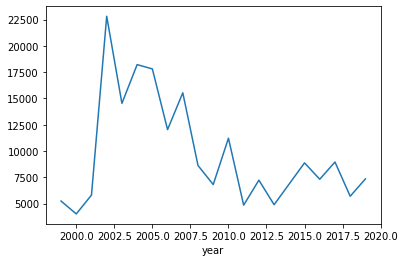

In [98]:
sum_firespots_amz_legal.groupby('year').mean().plot()

<AxesSubplot:xlabel='year'>

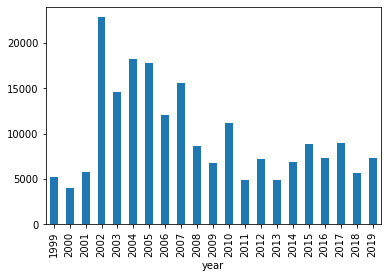

In [97]:
sum_firespots_amz_legal.groupby('year').mean().plot(kind="bar")

<AxesSubplot:xlabel='year'>

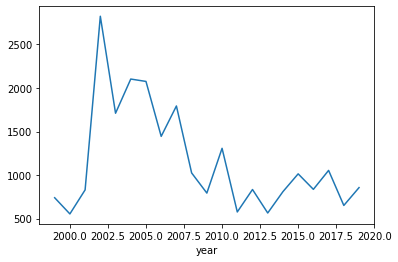

In [88]:
amazon_fires_df.groupby('year')['firespots'].mean().plot()

<AxesSubplot:xlabel='year'>

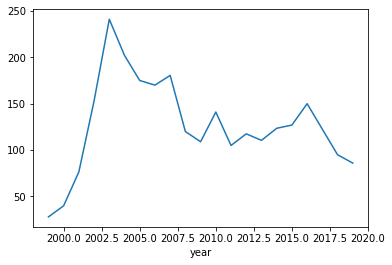

In [87]:
amazon_fires_df.groupby('year')['firespots'].median().plot()

<AxesSubplot:xlabel='year'>

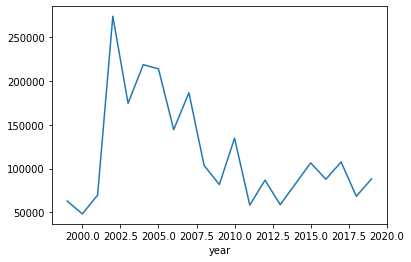

In [89]:
amazon_fires_df.groupby('year')['firespots'].sum().plot()

<AxesSubplot:xlabel='year'>

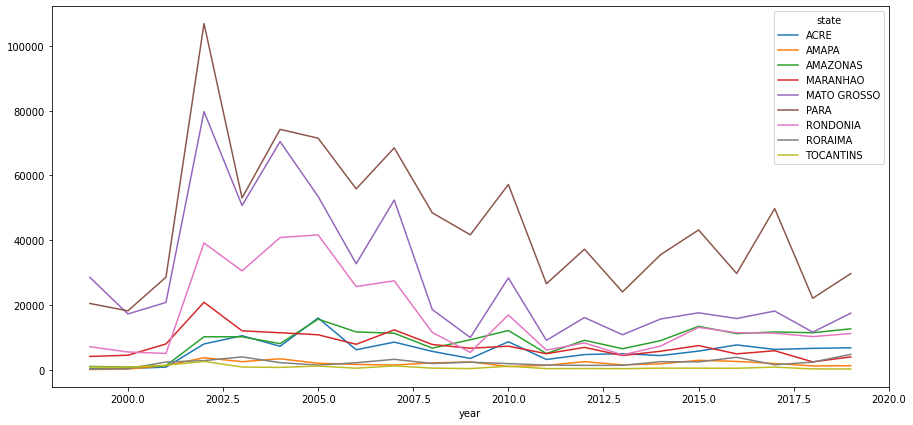

In [144]:
fig, ax = plt.subplots(figsize=(15,7))
amazon_fires_df.groupby(['year','state'])['firespots'].sum().unstack().plot(ax=ax)

<AxesSubplot:xlabel='month'>

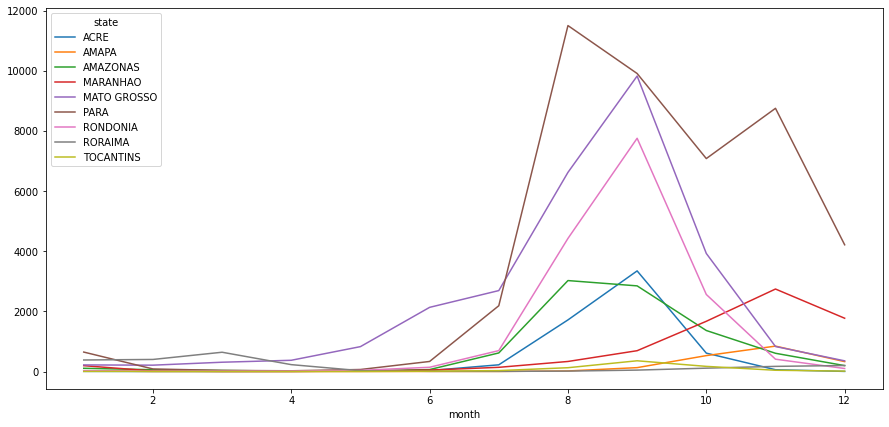

In [94]:
fig, ax = plt.subplots(figsize=(15,7))
amazon_fires_df.groupby(['month','state'])['firespots'].mean().unstack().plot(ax=ax)

### Agrupamento por presidentes (2004-2019)

#### Lula (2004-2010)
De fato, de 2003 até 2010, mas a base começa em 2004.

In [145]:
df_lula = def_area_df[def_area_df['Ano/Estados'] <= 2010]
df_lula.head(10)

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000


#### Dilma (2011-2016)
De fato, até ago/2016, momento do impeachement.

In [146]:
r, l = def_area_df['Ano/Estados'] <= 2016, def_area_df['Ano/Estados'] >= 2011
indexes = r & l
df_dilma = def_area_df[indexes]
df_dilma.head(10)

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891
10,2014,309,500,31,257,1075,1887,684,219,50,5012
11,2015,264,712,25,209,1601,2153,1030,156,57,6207
12,2016,372,1129,17,258,1489,2992,1376,202,58,7893


#### Temer (2016-2018)

In [147]:
r, l = def_area_df['Ano/Estados'] <= 2018, def_area_df['Ano/Estados'] >= 2016
indexes = r & l
df_temer = def_area_df[indexes]
df_temer.head(10)

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
12,2016,372,1129,17,258,1489,2992,1376,202,58,7893
13,2017,257,1001,24,265,1561,2433,1243,132,31,6947
14,2018,444,1045,24,253,1490,2744,1316,195,25,7536


#### Bolsonaro (2019-2019)
De fato, até 2021, contudo a base só vai até 2019.

In [148]:
df_bolsonaro = def_area_df[def_area_df['Ano/Estados'] >= 2019]
df_bolsonaro.head(10)

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
15,2019,688,1421,8,215,1685,3862,1245,617,21,9762


#### Esquerda (2004-2016)

In [149]:
df_esquerda = df_lula.append(df_dilma)
df_esquerda.head(10)

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


#### Direita (2016-2019)

In [150]:
df_direita = df_temer.append(df_bolsonaro)
df_direita.head(10)

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
12,2016,372,1129,17,258,1489,2992,1376,202,58,7893
13,2017,257,1001,24,265,1561,2433,1243,132,31,6947
14,2018,444,1045,24,253,1490,2744,1316,195,25,7536
15,2019,688,1421,8,215,1685,3862,1245,617,21,9762


#### Teste Hipótese 1

In [153]:
size_esq = len(df_esquerda['AMZ LEGAL'])
media_esq = df_esquerda['AMZ LEGAL'].mean()
desvio_esq = df_esquerda['AMZ LEGAL'].std()

size_dir =len(df_direita['AMZ LEGAL'])
media_dir = df_direita['AMZ LEGAL'].mean()
desvio_dir = df_direita['AMZ LEGAL'].std()

# uso de sp pois as médias são independentes (anos diferentes)
sp = np.sqrt(((size_esq - 1) * media_esq**2 + (size_dir - 1 ) * media_dir**2)
             / (size_esq + size_dir -2))

# uso de t ao invés de z pois número de amostras menor que 30
t = (media_esq - media_dir) / (sp * np.sqrt((1 / size_esq) + (1 / size_dir)))

t

0.42445502467144486